In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Bad key "text.kerning_factor" on line 4 in
/home/max/miniconda3/envs/codeastro/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [10]:
class general_plots:
    def __init__(self, nb_rows_col):
        self.nb_rows = nb_rows_col[0]
        self.nb_col = nb_rows_col[1]
        self.nb_plot = self.nb_rows * self.nb_col
        #self.fig_name = "Plot"

    def line(self, data, col_list, fig_name="Plot"):

        x, y = self.get_components(data, col_list)
             
        fig, ax = plt.subplots(self.nb_rows, self.nb_col, figsize=(7,7))

        ax.set(xlim=(0, 10), ylim=(-2, 2), xlabel='x', ylabel='y(x)',title=fig_name)
        ax.plot(x, y, c='red', linestyle='-', alpha = 0.8, label='sin', linewidth=2)
        #ax.plot(x, y2, c='blue', linestyle='dashed', alpha = 0.4, label='cos', linewidth=1)
        # ax.plot(x,y3, c='purple', linestyle='-.', alpha = 0.4, label='cos', linewidth=1)
        ax.grid(linestyle=':', linewidth =1, alpha=0.5)
        ax.hlines(y = 1, xmin = 0, xmax = 4, color='green', linestyle=':', linewidth =3) 
        ax.vlines(x = 1, ymin = 0, ymax = 4, color='pink', linestyle='--', linewidth =3) 
        ax.tick_params(axis="x", labelsize=13)
        ax.tick_params(axis="y", labelsize=13)
        ax.set_xlabel('X', fontsize=18)
        ax.set_ylabel('Y', fontsize=18)
        ax.legend(loc=4, ncol=1, framealpha=0.7, title='legend', markerscale=0.3)
        plt.show()




    def get_components(self, data, col_list):
        # Dataframe
        if type(data) == pd.core.frame.DataFrame:
            if all(type(elem) == int for elem in col_list) == True:
                x = data.iloc[:,col_list[0]]
                y = data.iloc[:,col_list[1]]
            elif all(type(elem) == str for elem in col_list) == True:
                x = data.loc[:,col_list[0]]
                y = data.loc[:,col_list[1]]
            else:
                print('Error: the column list is not well-specified')
        # Array or list
        elif type(data) == np.ndarray or type(data) == list:
            # List of tuples
            if all(isinstance(item, tuple) for item in data):
                x = [i[col_list[0]] for i in data]
                y = [i[col_list[1]] for i in data]
            else:
                x = data[:,col_list[0]]
                y = data[:,col_list[1]]
        # Tuple
        elif type(data) == tuple:
            x = [i[col_list[0]] for i in data]
            y = [i[col_list[1]] for i in data]
        else:
            sys.exit('The data format is not recognized')
        return x, y

    
    def load_data(self):
        
        return 0

    def save_fig(self):
        print("save")
        return 

### Data

In [18]:
x  = np.linspace(0, 10, 1000)
y1 = np.cos(x)
y2 = np.tan(x)
y3 = np.sin(x)

data = list([x, y1, y2, y3])
data0 = np.transpose(data)
data1 = pd.DataFrame(data0, columns=['x', 'cos', 'tan', 'sin'])
data2 = ((9,7,5), (8,6,5), (3,1,2), (33,4,55), (4,5,6))
data3 = [(9,7,5), (8,6,5), (3,1,2), (33,4,55), (4,5,6)]

### Create object and call methods:

In [20]:
nb_rows_col = (1,1)
c = general_plots(nb_rows_col)


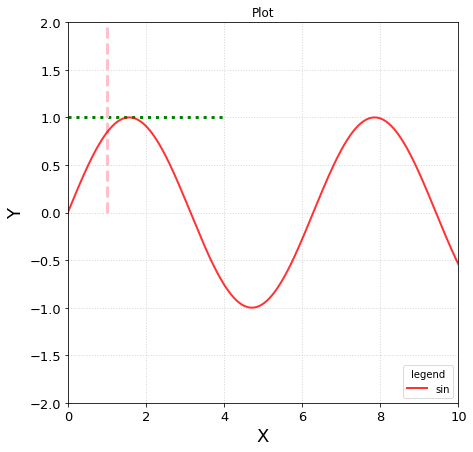

In [13]:
c.line(data0, col_list=['x','sin'])

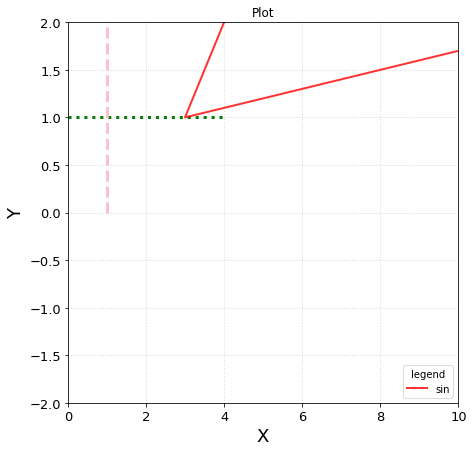

In [21]:
c.line(data3, col_list=[0,1])